In [ ]:
#load python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
#load dataset
df = pd.read_excel('HR-Employee-Attrition2.xlsx')

In [ ]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.duplicated().sum()

0

In [ ]:
df1 = df.select_dtypes('object')
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Satisfied,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Disatisfied,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Neutral,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Neutral,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Disatisfied,Married,Y,No
...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Satisfied,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Very disatisfied,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Disatisfied,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Disatisfied,Married,Y,No


In [ ]:
df1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
JobSatisfaction,1470,4,Satisfied,459
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


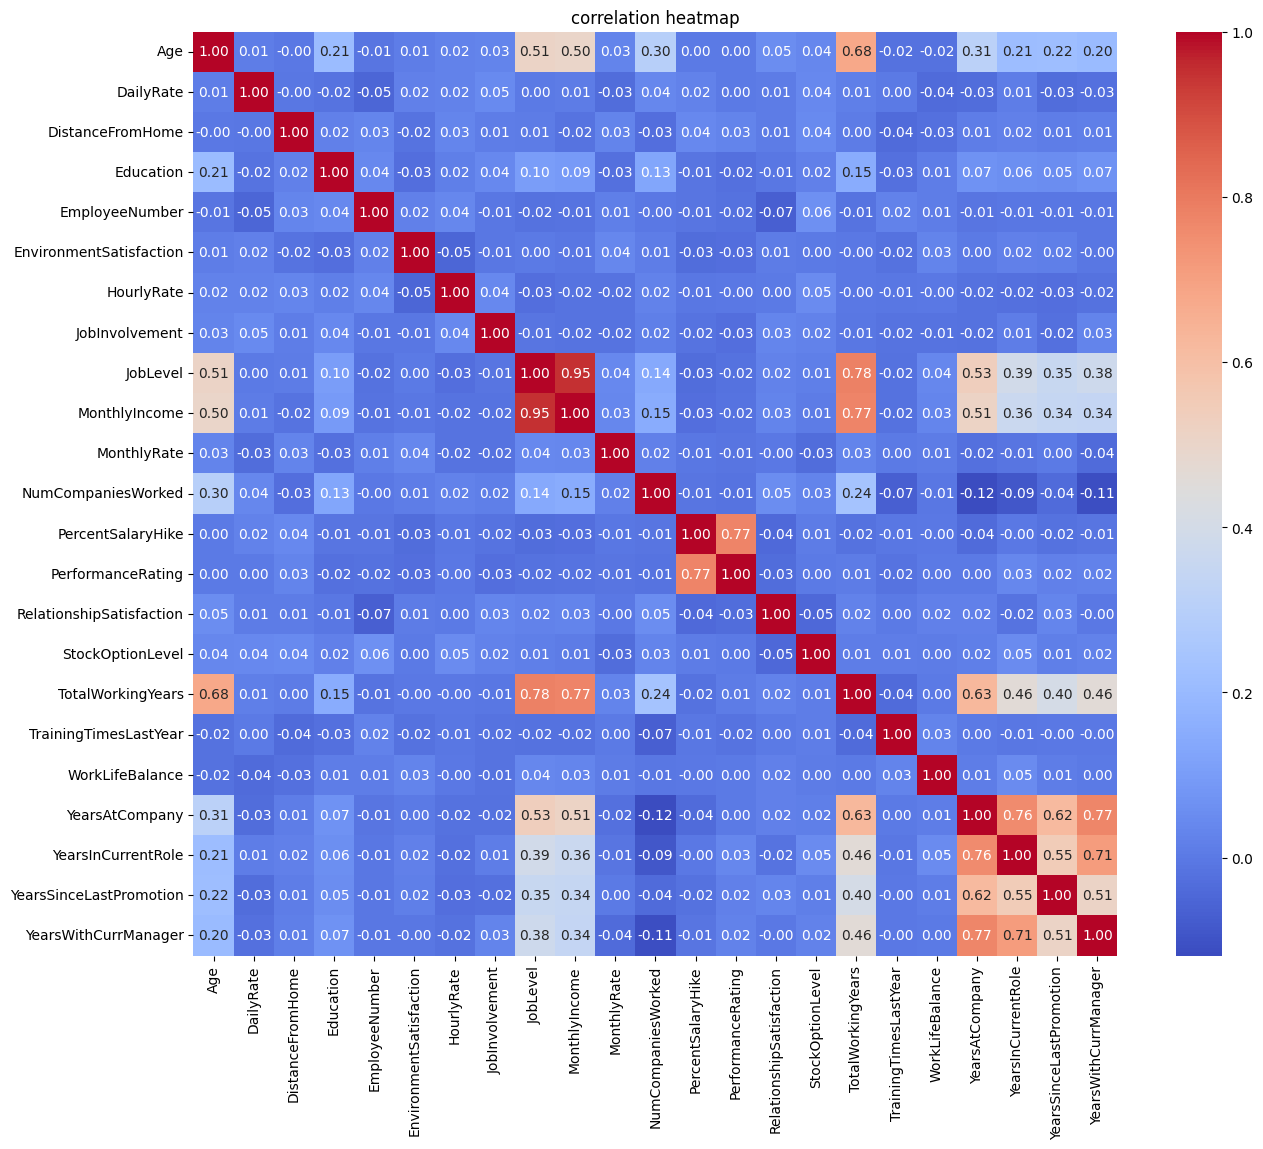

In [ ]:

data = df.drop(['Over18','EmployeeCount','StandardHours'],axis=1)

plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("correlation heatmap")
plt.show()

# Histrogram distribution for all the numercal columns

A histogram is a graph that shows the frequency of numerical data using rectangles. The height of a rectangle (the vertical axis) represents the distribution frequency of a variable (the amount, or how often that variable appears).

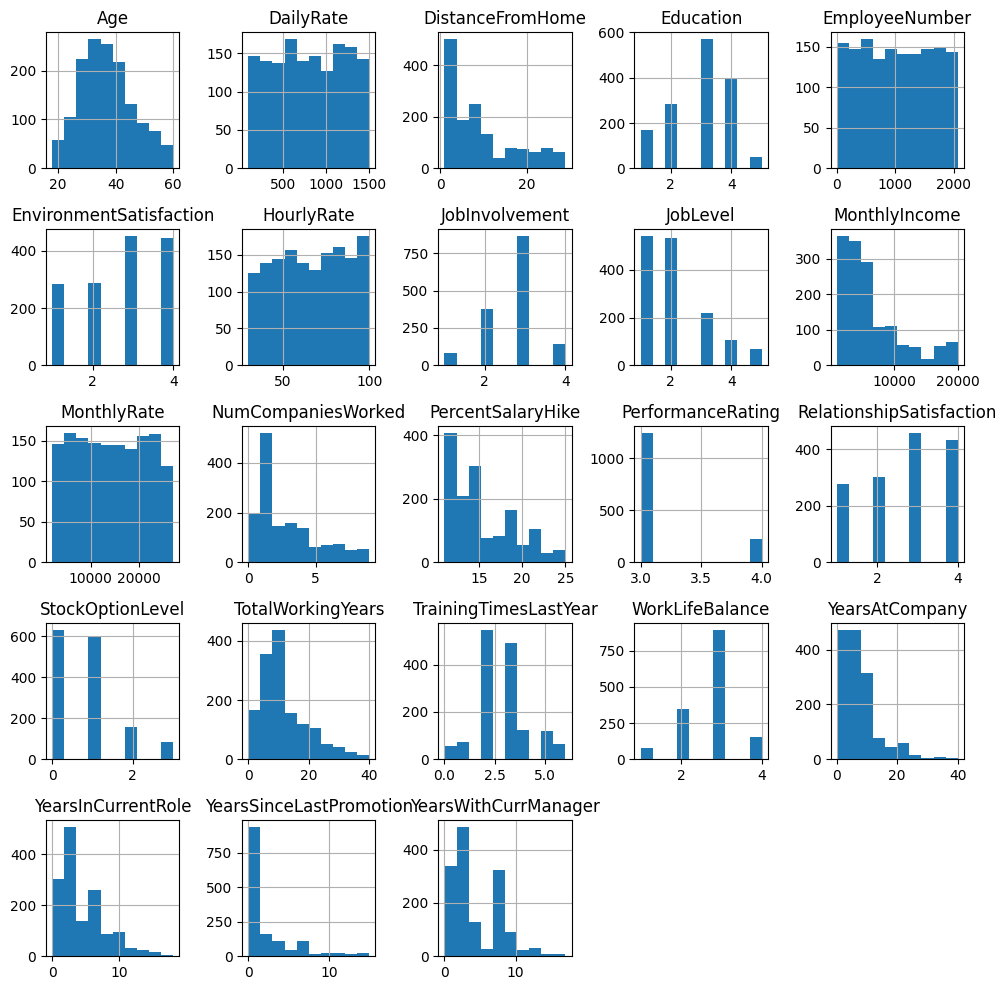

In [ ]:
# Histrogram distribution
data.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

# Exploratory data analysis (EDA)

EDA is a crucial step in any data analysis or data science project.

It involves:

- Investigating and to discover patterns
- Forming hypotheses based on the dataset
- Uncovering underlying structure
- Extracting important variables

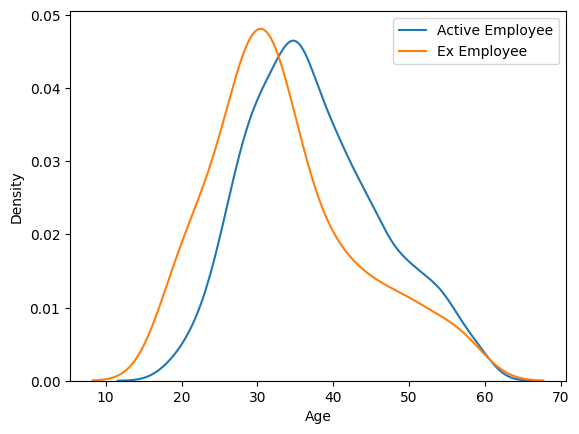

In [ ]:
sns.kdeplot(df.loc[df['Attrition']=='No','Age'],label='Active Employee')
sns.kdeplot(df.loc[df['Attrition']=='Yes','Age'],label='Ex Employee')

plt.legend()
plt.show()

In [ ]:
#categorical columns
cat = data.select_dtypes(['object']).columns

#numerical columns

num = data.select_dtypes(['number']).columns



In [ ]:
for i in cat:
  print("unique values of:",i,set(df[i]))

unique values of: Attrition {'No', 'Yes'}
unique values of: BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
unique values of: Department {'Research & Development', 'Sales', 'Human Resources'}
unique values of: EducationField {'Other', 'Medical', 'Human Resources', 'Life Sciences', 'Marketing', 'Technical Degree'}
unique values of: Gender {'Male', 'Female'}
unique values of: JobRole {'Laboratory Technician', 'Sales Executive', 'Research Director', 'Human Resources', 'Research Scientist', 'Sales Representative', 'Healthcare Representative', 'Manufacturing Director', 'Manager'}
unique values of: JobSatisfaction {'Disatisfied', 'Neutral', 'Very disatisfied', 'Satisfied'}
unique values of: MaritalStatus {'Married', 'Divorced', 'Single'}
unique values of: OverTime {'No', 'Yes'}


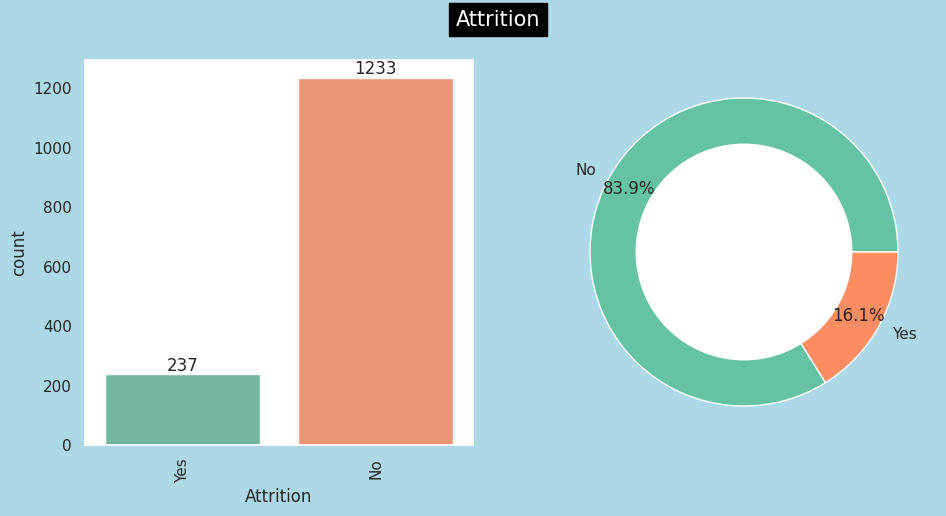

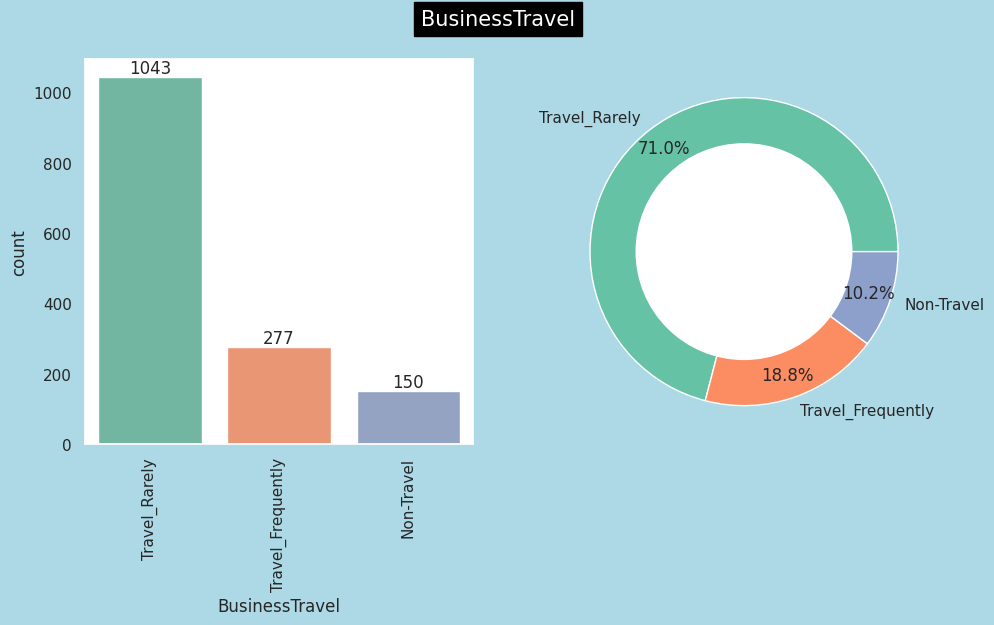

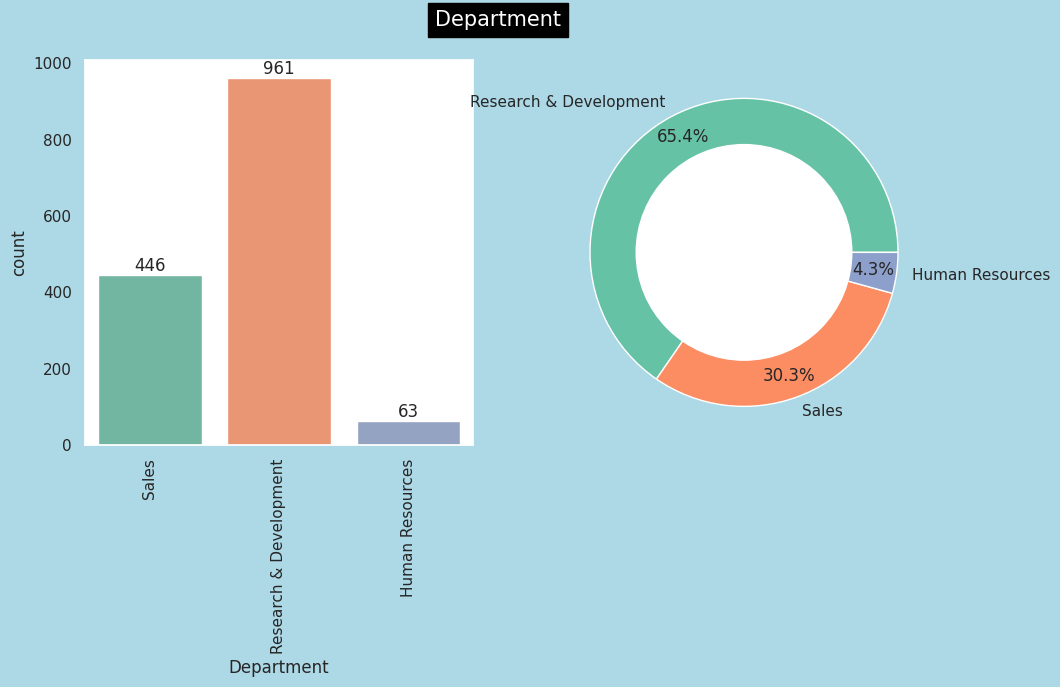

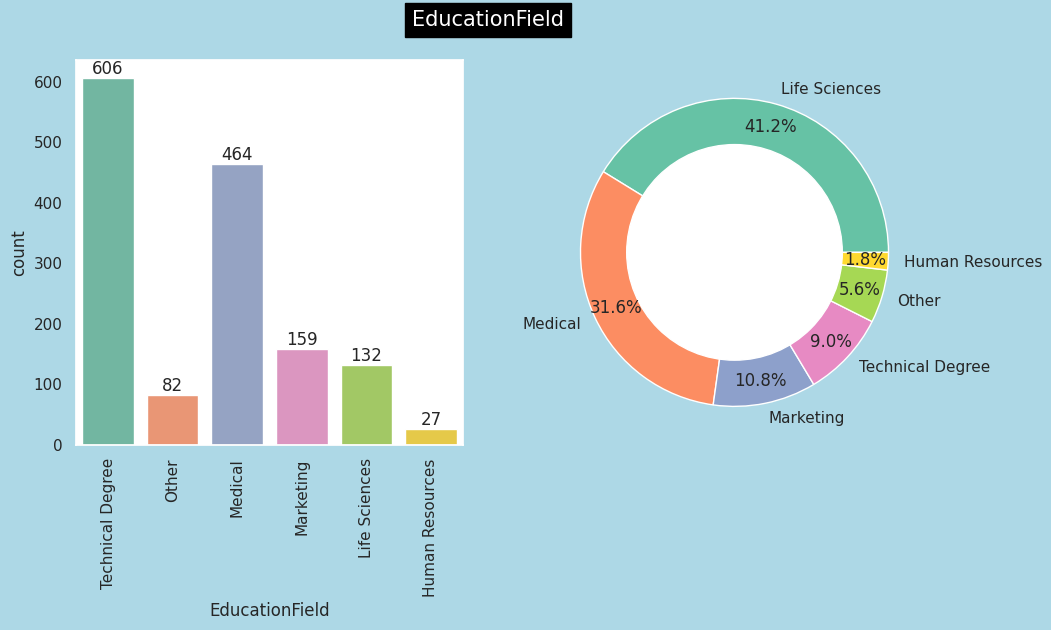

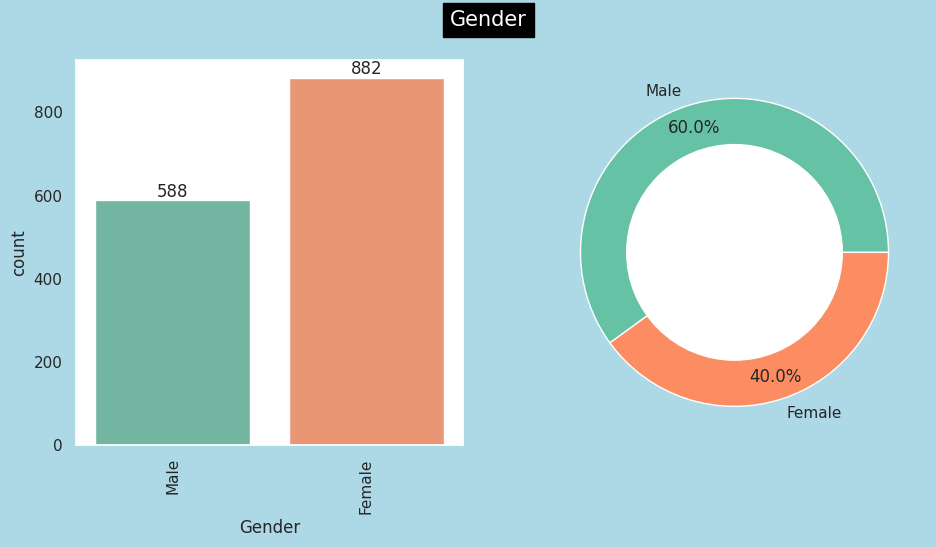

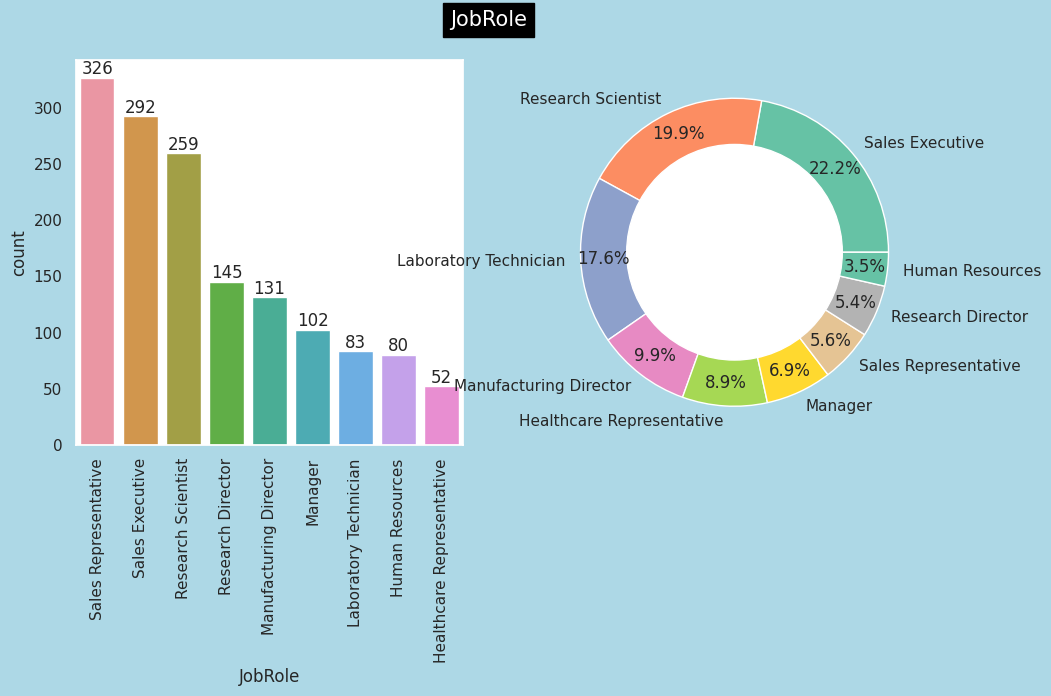

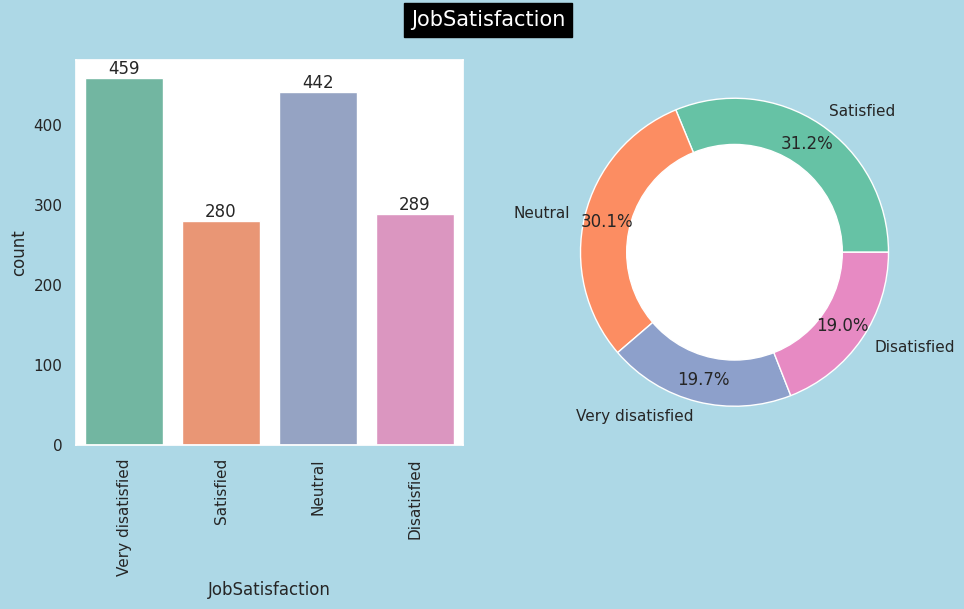

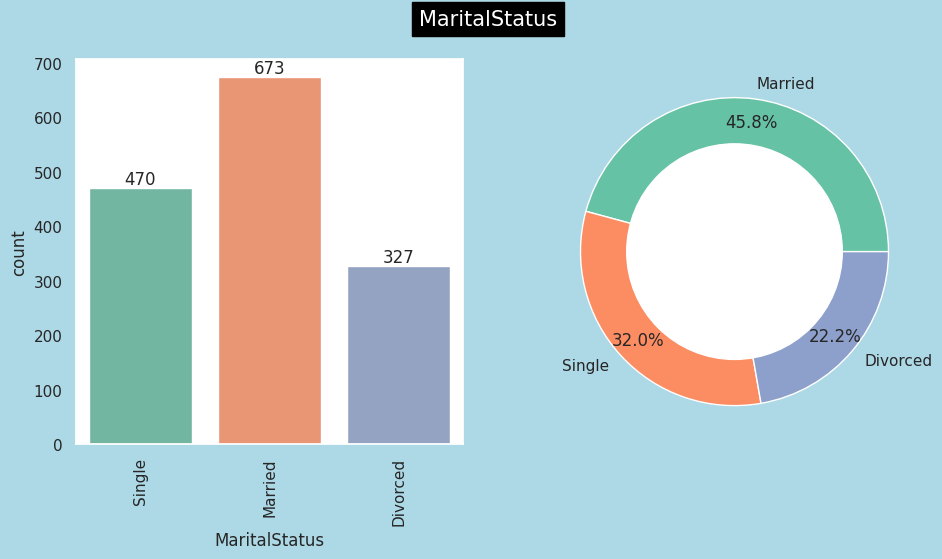

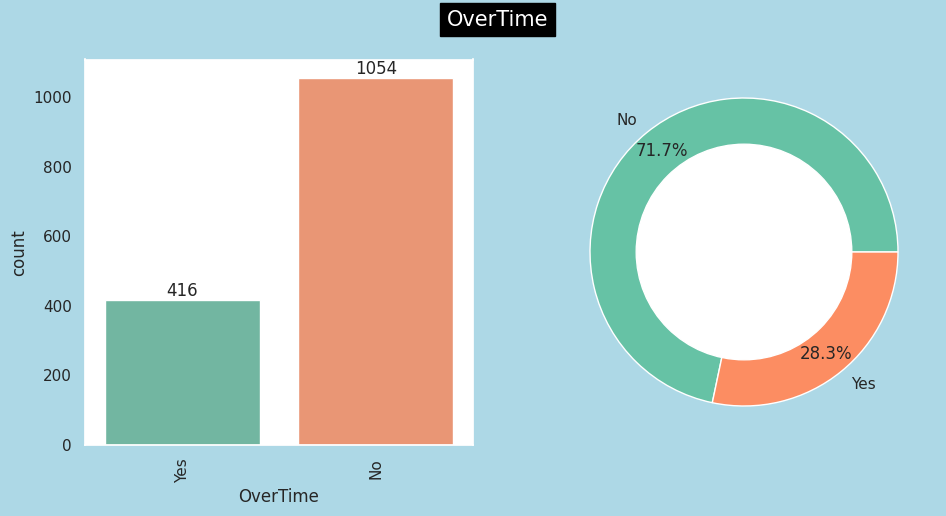

In [ ]:
sns.set(rc={'axes.facecolor':'white','figure.facecolor':'Lightblue'})
sns.set_palette("Set2")
for i, col in enumerate(cat):
    fig, axes = plt.subplots(1,2,figsize=(11,5))



    ax = sns.countplot(data=data,x=col , ax=axes[0])


    index = [var for var in df[col].value_counts(ascending=False).sort_index(ascending=False).index]
    ax.set_xticklabels(index,rotation=90)

    for container in axes[0].containers:
        axes[0].bar_label(container)


    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05,0.05)


    axes[1].pie(size , labels=index,autopct='%1.1f%%',pctdistance=0.85)

    #inner circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='black',color='white',fontsize=15)


    plt.show()

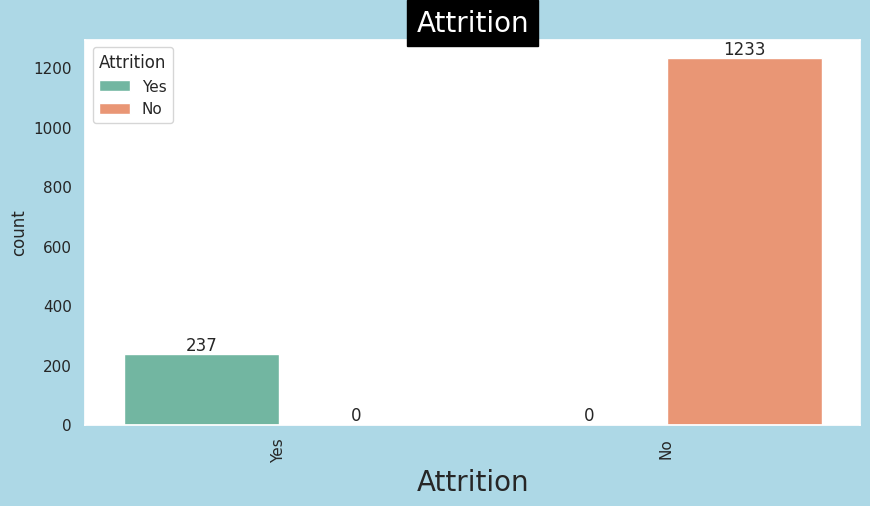

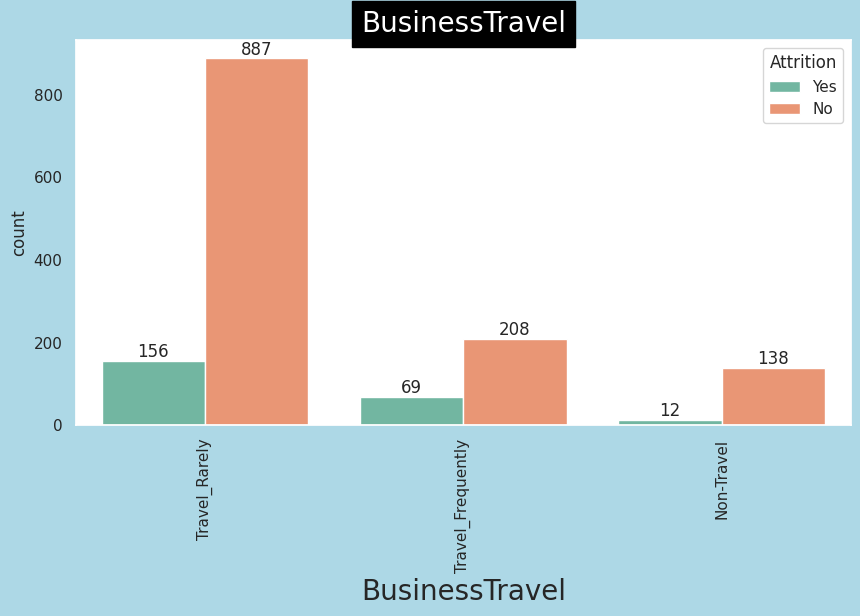

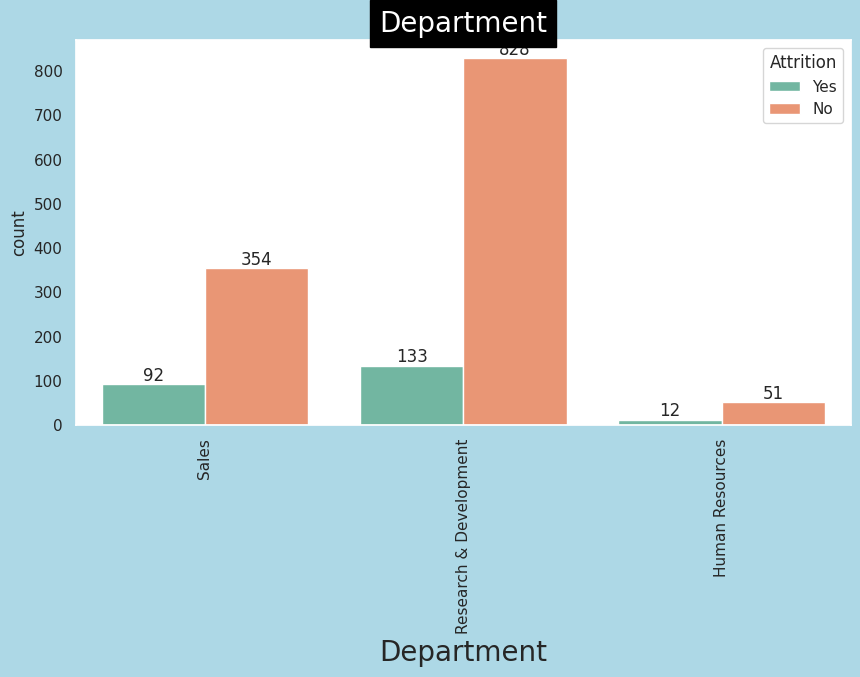

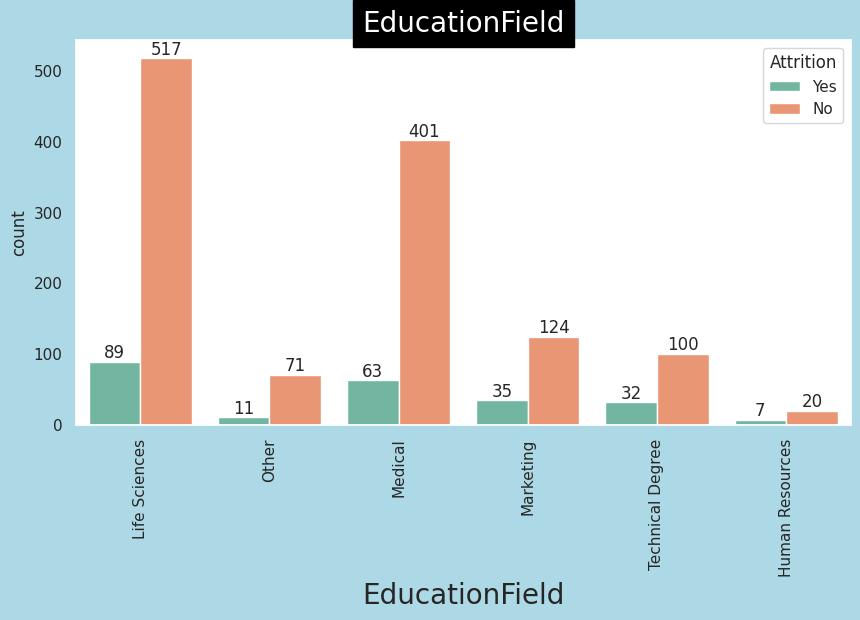

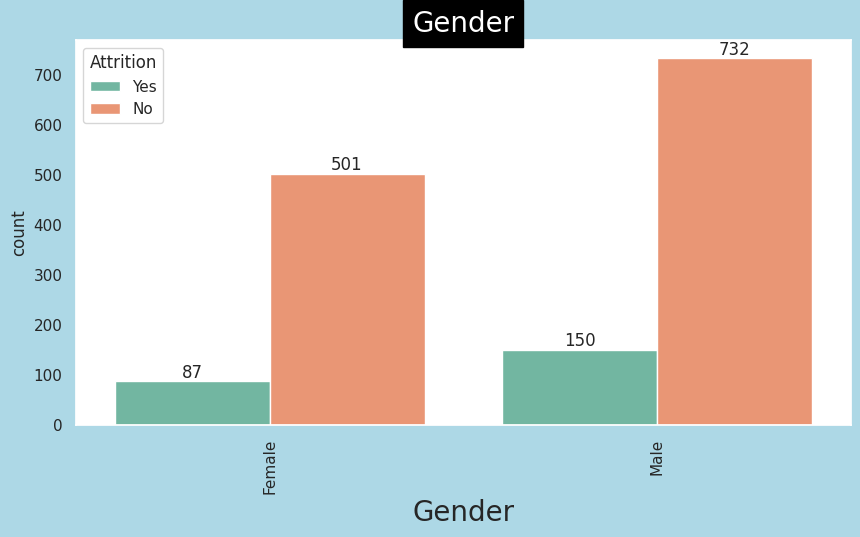

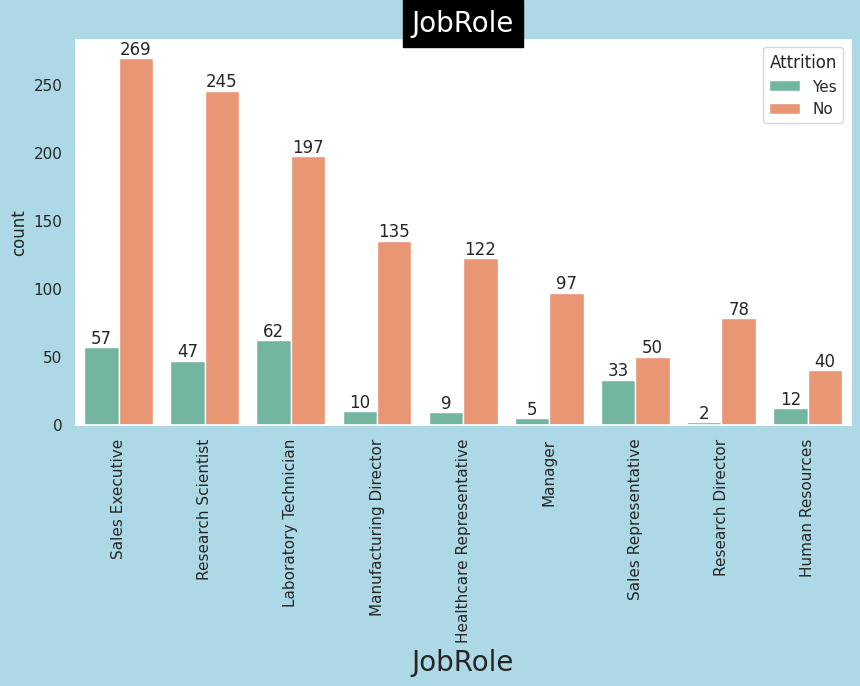

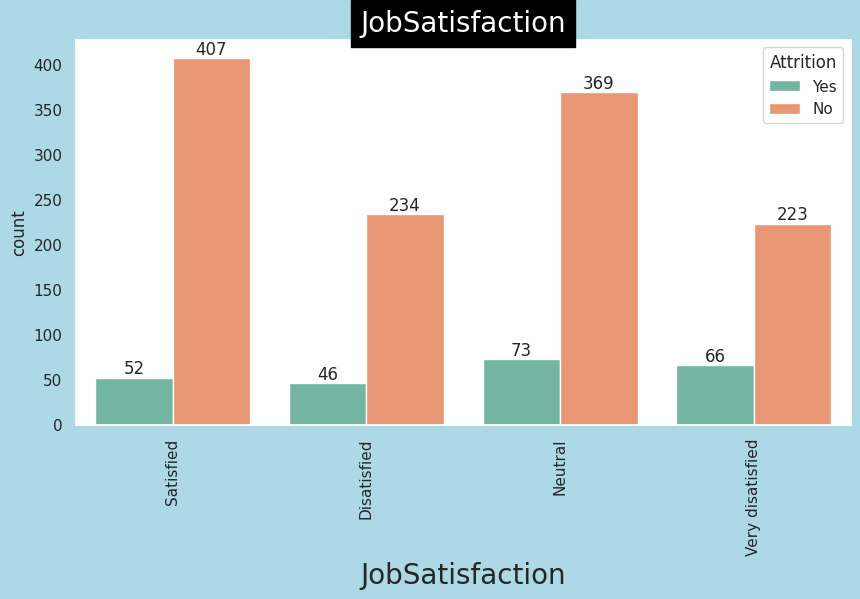

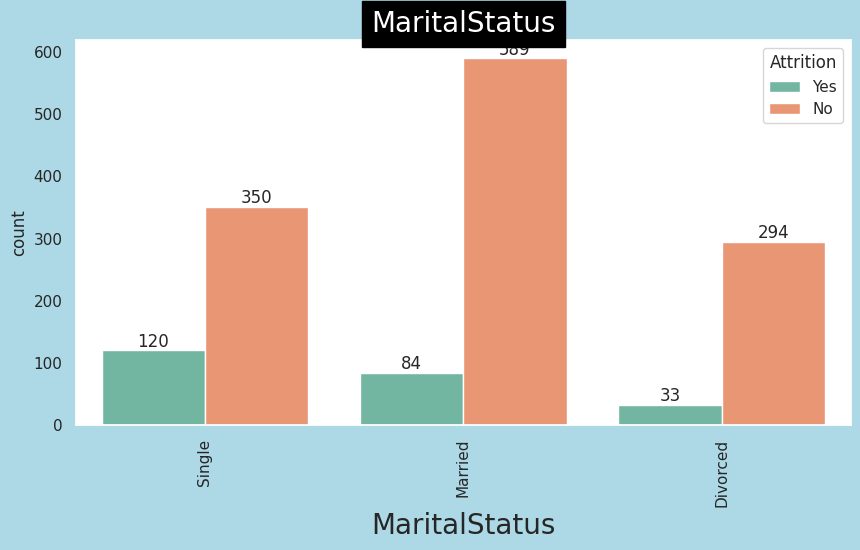

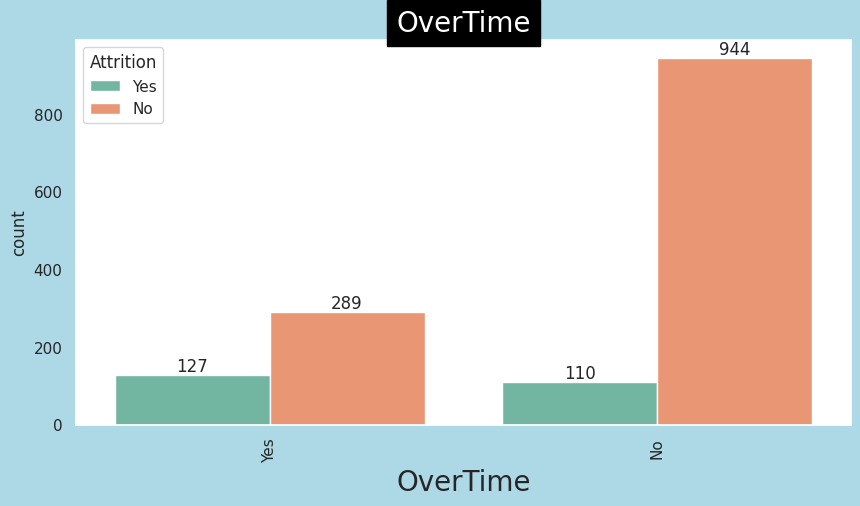

In [ ]:
for col in cat:
    plt.figure(figsize=(10,5))

    ax = sns.countplot(x=df[col],data=df,hue='Attrition')

    for container in ax.containers:
        ax.bar_label(container)

    plt.title(col,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(col,fontsize=20)
    plt.grid()
    plt.show()

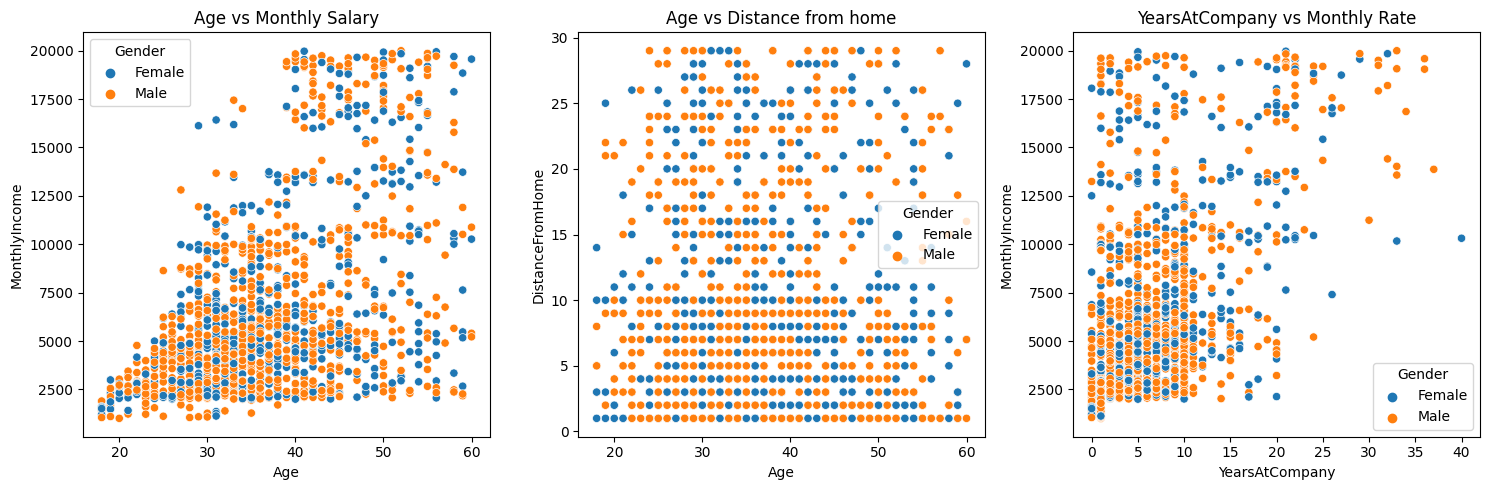

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(data=data, x='Age', y='MonthlyIncome',  hue='Gender')
plt.title('Age vs Monthly Salary')


plt.subplot(1,3,2)
sns.scatterplot(data=data, x='Age', y='DistanceFromHome', hue='Gender')
plt.title('Age vs Distance from home')

plt.subplot(1,3,3)
sns.scatterplot(data=data, x='YearsAtCompany', y='MonthlyIncome', hue='Gender')
plt.title('YearsAtCompany vs Monthly Rate')

plt.tight_layout()
plt.show()


In [ ]:
df_copy = data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df_copy['Attrition'] = label_encoder.fit_transform(df_copy['Attrition'])
df_copy['OverTime'] = label_encoder.fit_transform(df_copy['OverTime'])
df_copy['Gender'] = label_encoder.fit_transform(df_copy['Gender'])

In [ ]:
df_copy = pd.get_dummies(df_copy,columns=['BusinessTravel','Department','EducationField','JobRole','JobSatisfaction','MaritalStatus'])

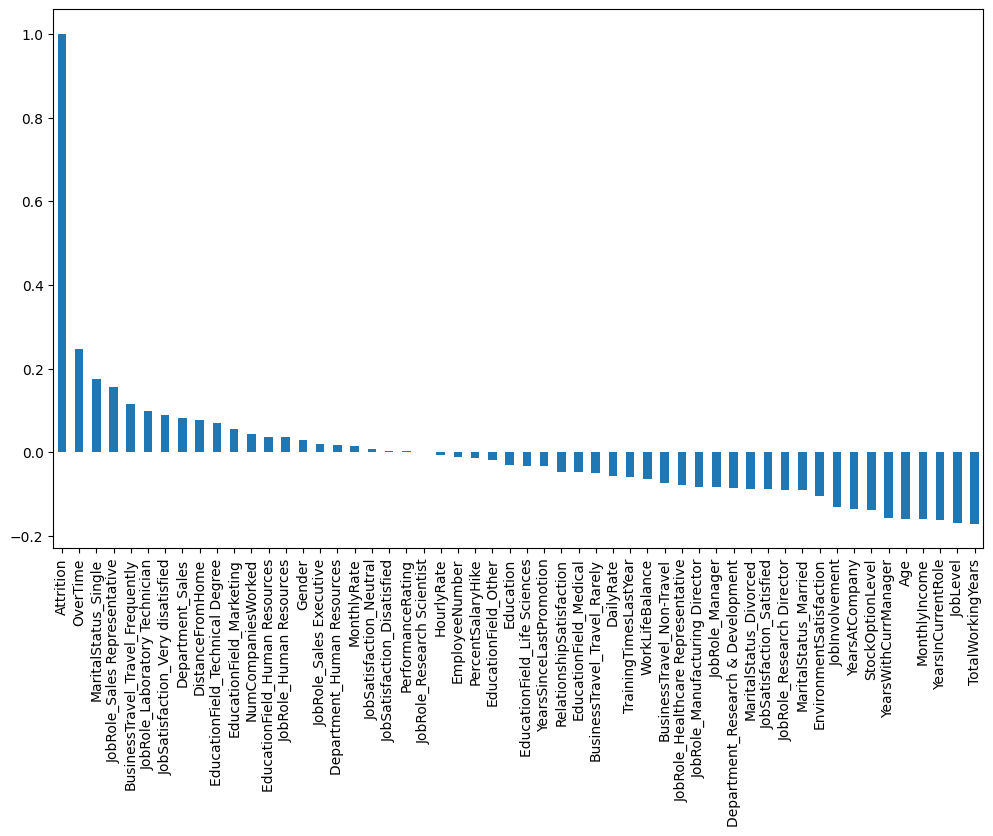

In [ ]:
plt.figure(figsize=(12,7))
correlations = df_copy.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

# **Model Preparation for Prediction**

In [ ]:
# Features and target
X = df_copy.drop(columns=['Attrition'])
y = df_copy['Attrition']

X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2,random_state=0)



In [ ]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_train , smote_target = oversampler.fit_resample(X_train,Y_train)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(smote_train,smote_target)
y_pred_lg = log_reg.predict(X_test)

print('accuracy',metrics.accuracy_score(Y_test,y_pred_lg))

accuracy 0.826530612244898


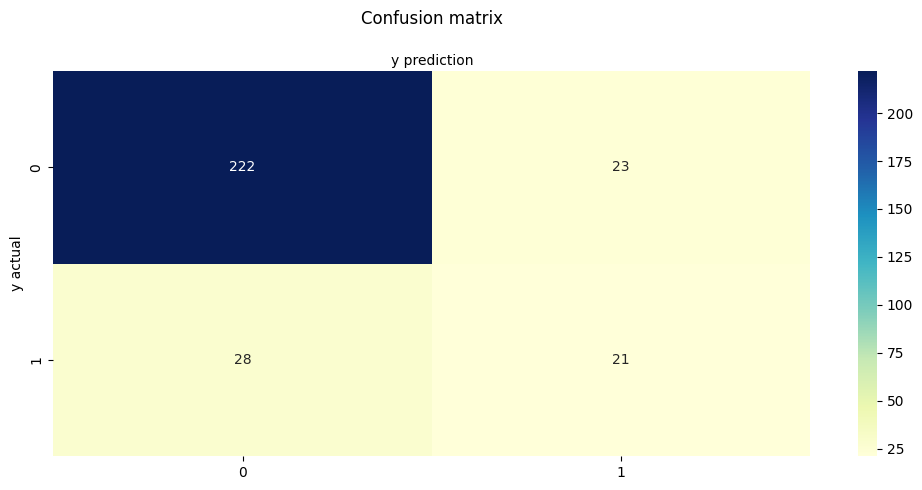

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       245
           1       0.48      0.43      0.45        49

    accuracy                           0.83       294
   macro avg       0.68      0.67      0.67       294
weighted avg       0.82      0.83      0.82       294



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sm = metrics.confusion_matrix(Y_test,y_pred_lg)
sns.heatmap(sm,annot=True,cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(Y_test, y_pred_lg))

# **2 : Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train,smote_target)
y_pred_rf = rfc.predict(x_test)

print('accuracy',metrics.accuracy_score(y_test,y_pred_rf))

accuracy 0.9727891156462585


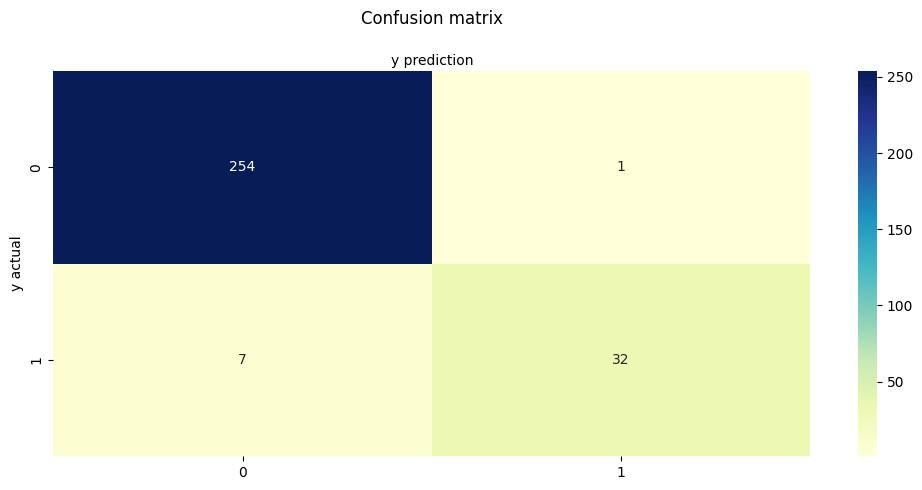

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       255
           1       0.97      0.82      0.89        39

    accuracy                           0.97       294
   macro avg       0.97      0.91      0.94       294
weighted avg       0.97      0.97      0.97       294



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_test, y_pred_rf))

# Best model with 97% accuracy is RandomForestClassifier